# Project

## ***Loan Prediction***

BY Sajeewa Dilshan

#### Problem Statement

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.,I will try to show you how different models can improve just by doing simple process on the data .

#### These are the Machine Learning Models that I'm gonna use for this Model.

1.Logistic Regression


2.K-Nearest Neighbour (KNN)


3.Support Vector Machine (SVM)




4.Naive Bayes

5.Decision Tree

6.Random Forest

7.Gradient Boost

In [2228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from imblearn.over_sampling import SMOTE,ADASYN

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,plot_tree,export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from scipy import stats
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,roc_curve,roc_auc_score

#### Import the dataset

In [1981]:
df = pd.read_csv("C:\\Users\\proto\\Downloads\\Data Science, Machine Learning, Data Analytics\\ML and AI\\projects\\Loan\\loan_data_set.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### Shape of the dataset

In [1982]:
df.shape #614 Row and 13 Columns

(614, 13)

### Disribution For the categorical variables

*****Loan_ID*****

In [1983]:
df.Loan_ID.value_counts()

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

 We can be seen that there are 614 unique ID in the dataset.

*****Gender*****

In [1984]:
df.Gender.value_counts(dropna=False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

In [1985]:
Gender=df.Gender.unique()

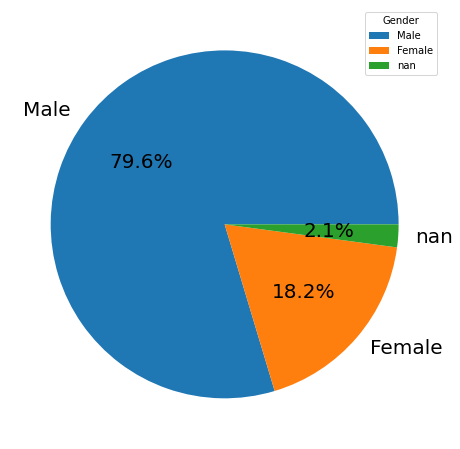

In [1986]:
plt.figure(figsize=(8,8))
plt.pie(df.Gender.value_counts(dropna=False),labels=Gender,autopct="%.1f%%",textprops={'fontsize': 20})
plt.legend(title="Gender")
plt.show()

***Married***

In [1987]:
df.Married.value_counts(dropna=False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

In [1988]:
Married=df.Married.unique()
Married

array(['No', 'Yes', nan], dtype=object)

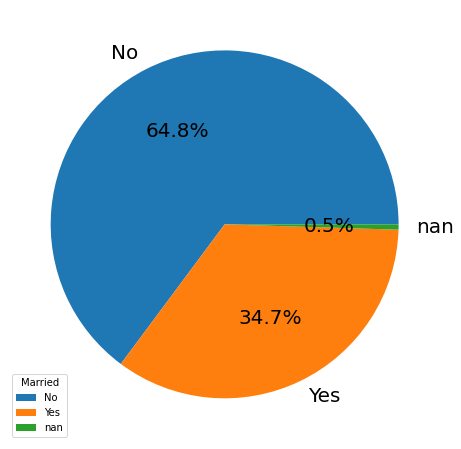

In [1989]:
plt.figure(figsize=(8,8))
plt.pie(df.Married.value_counts(dropna=False),labels=Married,autopct="%.1f%%",textprops={'fontsize': 20})
plt.legend(title="Married")
plt.show()

***Education***

In [1990]:
df.Education.value_counts(dropna=False)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [1991]:
Education=df.Education.unique()

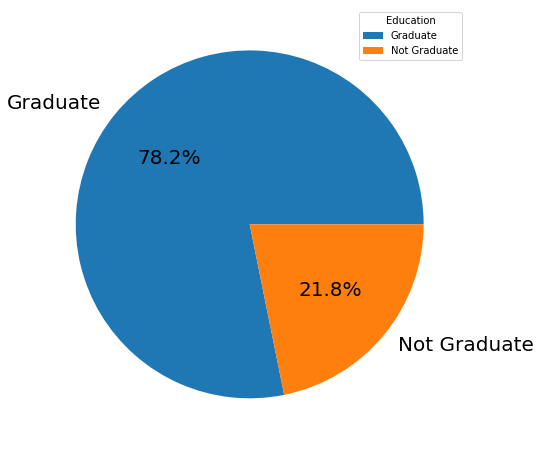

In [1992]:
plt.figure(figsize=(8,8))
plt.pie(df.Education.value_counts(dropna=False),labels=Education,autopct="%.1f%%",textprops={'fontsize': 20})
plt.legend(title="Education")
plt.show()

No null values

***Self Employed***

In [1993]:
df.Self_Employed.value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

In [1994]:
Self_Employed=df.Self_Employed.unique()

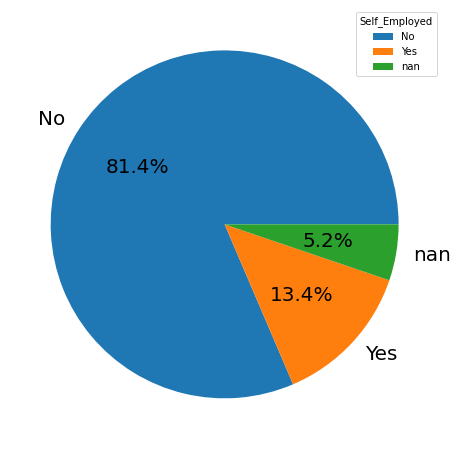

In [1995]:
plt.figure(figsize=(8,8))
plt.pie(df.Self_Employed.value_counts(dropna=False),labels=Self_Employed,autopct="%.1f%%",textprops={'fontsize': 20})
plt.legend(title="Self_Employed")
plt.show()

***Credit History***

In [1996]:
df.Credit_History.value_counts(dropna=False)

1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64

In [1997]:
Credit_History=df.Credit_History.unique()

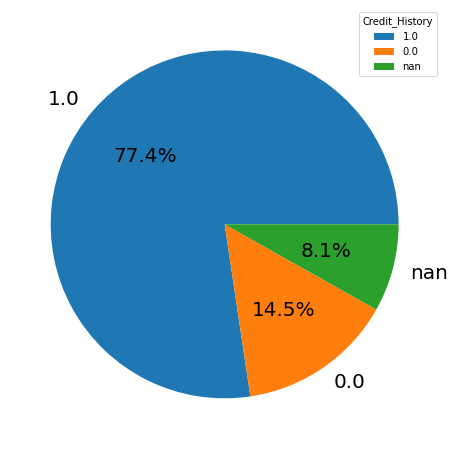

In [1998]:
plt.figure(figsize=(8,8))
plt.pie(df.Credit_History.value_counts(dropna=False),labels=Credit_History,autopct="%.1f%%",textprops={'fontsize': 20})
plt.legend(title="Credit_History")
plt.show()

 ***Property Area***

In [1999]:
df.Property_Area.value_counts(dropna=False)

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [2000]:
Property_Area=df.Property_Area.unique()

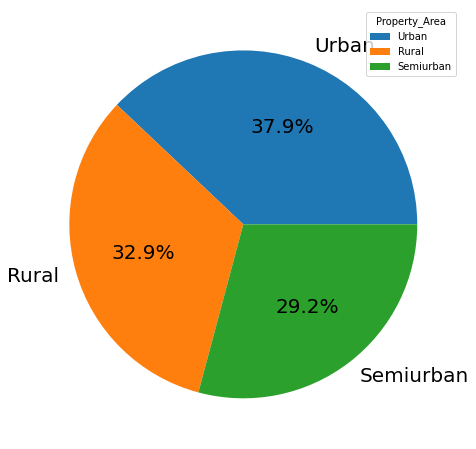

In [2001]:
plt.figure(figsize=(8,8))
plt.pie(df.Property_Area.value_counts(dropna=False),labels=Property_Area,autopct="%.1f%%",textprops={'fontsize': 20})
plt.legend(title="Property_Area")
plt.show()

***Loan Status***

In [2002]:
df.Loan_Status.value_counts(dropna=False)

Y    422
N    192
Name: Loan_Status, dtype: int64

In [2003]:
Loan_Status=df.Loan_Status.unique()

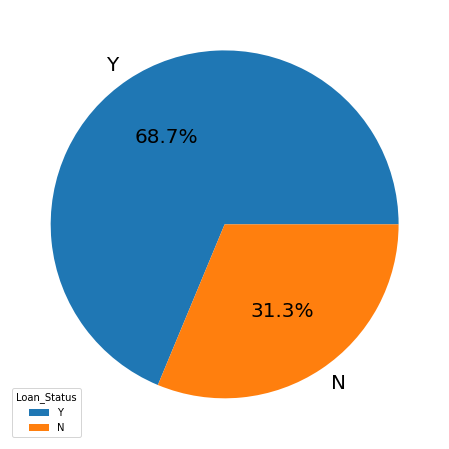

In [2004]:
plt.figure(figsize=(8,8))
plt.pie(df.Loan_Status.value_counts(dropna=False),labels=Loan_Status,autopct="%.1f%%",textprops={'fontsize': 20})
plt.legend(title="Loan_Status")
plt.show()

In [2005]:
df.Loan_Amount_Term.value_counts(dropna=False)

360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

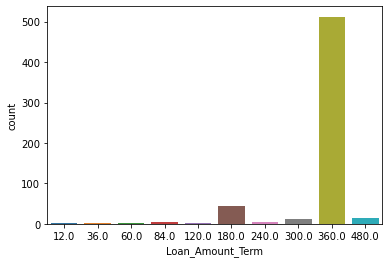

In [2006]:
sns.countplot(x="Loan_Amount_Term", data=df)
plt.show()

 the 360 days loan duration is the most popular 

### Disribution For the Numerical variables

In [2007]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


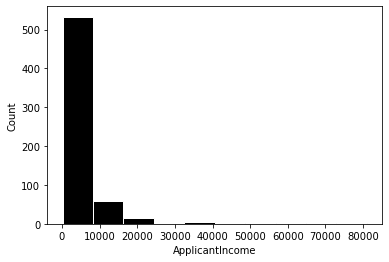

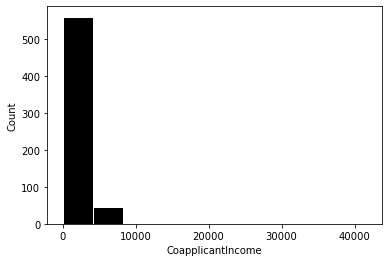

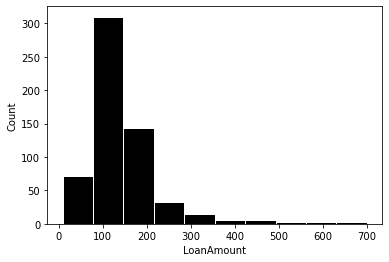

In [2008]:
plt.hist(df["ApplicantIncome"],color="black",edgecolor="white")
plt.xlabel("ApplicantIncome")
plt.ylabel("Count")
plt.show()


plt.hist(df["CoapplicantIncome"],color="black",edgecolor="white")
plt.xlabel("CoapplicantIncome")
plt.ylabel("Count")
plt.show()

plt.hist(df["LoanAmount"],color="black",edgecolor="white")
plt.xlabel("LoanAmount")
plt.ylabel("Count")
plt.show()

### Data Exploration between Numerical variables and categorical Varibales

***Numarical vs Numarical***

In [2009]:
df1=df[['ApplicantIncome','CoapplicantIncome','LoanAmount']]

Pair Plot

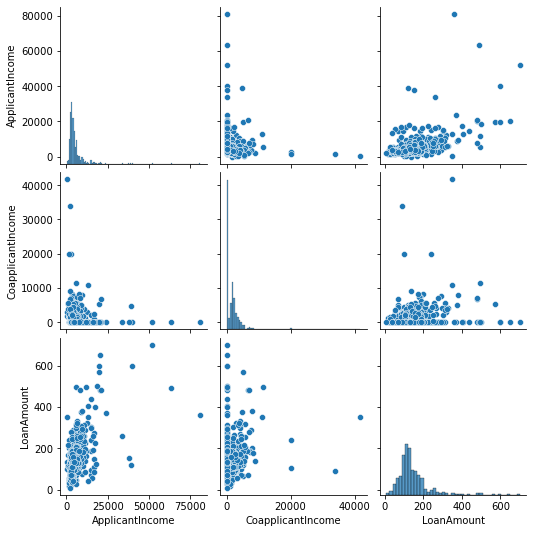

In [2010]:
sns.pairplot(df1)
plt.show()

In [2011]:
print('Pearson correlation:', df['ApplicantIncome'].corr(df['CoapplicantIncome']))
print('Pearson correlation:', df['LoanAmount'].corr(df['CoapplicantIncome']))
print('Pearson correlation:', df['ApplicantIncome'].corr(df['LoanAmount']))

Pearson correlation: -0.11660458122889966
Pearson correlation: 0.18861940442311753
Pearson correlation: 0.5709090389885667


Heat Maps

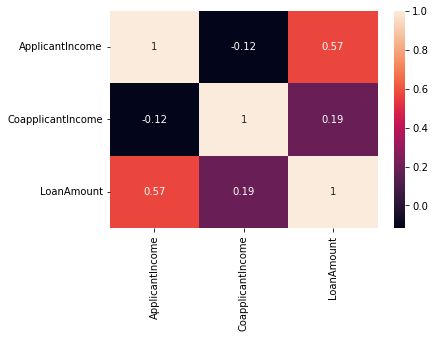

In [2012]:
sns.heatmap(df1.corr(),annot=True)
plt.show()

There is negative correlation between Applicant income and Co Applicant Income.

There is low positive correlation between LoanAmount and Co Applicant Income.

There is moderate positive correlation between Applicant income and LoanAmount.

***Categorical - Categorical***

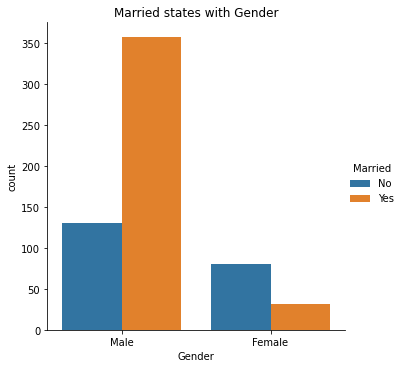

In [2013]:
sns.catplot(x="Gender", kind="count", hue="Married", data=df)
plt.title("Married states with Gender")
plt.show()

Males has higher chance of getting married compared to female

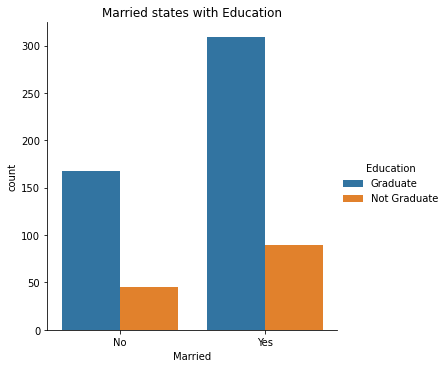

In [2014]:
sns.catplot(x="Married", kind="count", hue="Education", data=df)
plt.title("Married states with Education")
plt.show()

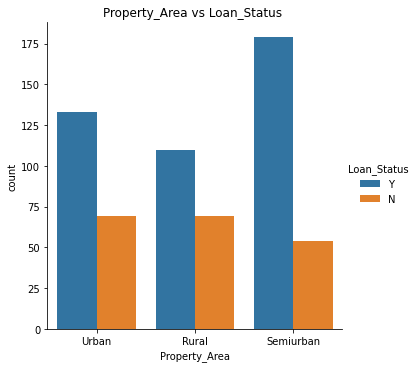

In [2015]:
sns.catplot(x="Property_Area", kind="count", hue="Loan_Status", data=df)
plt.title("Property_Area vs Loan_Status ")
plt.show()

semiurbun has most accepted loans

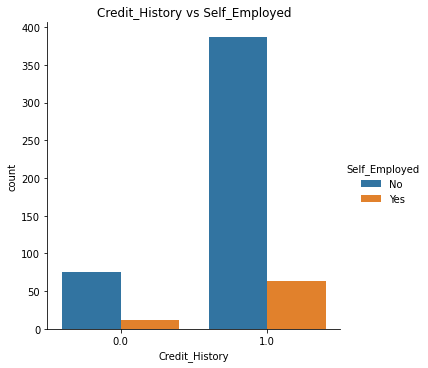

In [2016]:
sns.catplot(x="Credit_History", kind="count", hue="Self_Employed", data=df)
plt.title("Credit_History vs Self_Employed")
plt.show()

***Categorical - Numerical***

<function matplotlib.pyplot.show(close=None, block=None)>

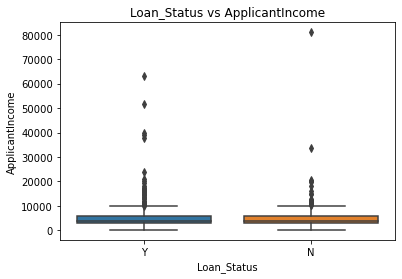

In [2017]:
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df)
plt.title("Loan_Status vs ApplicantIncome")
plt.show

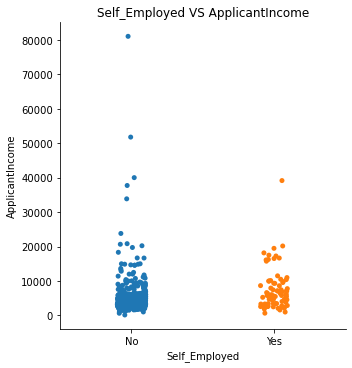

In [2018]:
sns.catplot(data=df,y="ApplicantIncome",x="Self_Employed")
plt.title("Self_Employed VS ApplicantIncome")
plt.show()

lots of outliers in Applicant Income

Text(0.5, 1.0, 'Loan_Status vs LoanAmount')

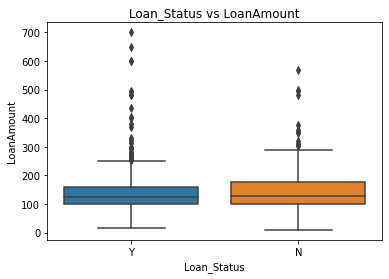

In [2019]:
sns.boxplot(x="Loan_Status", y="LoanAmount", data=df)
plt.title("Loan_Status vs LoanAmount")

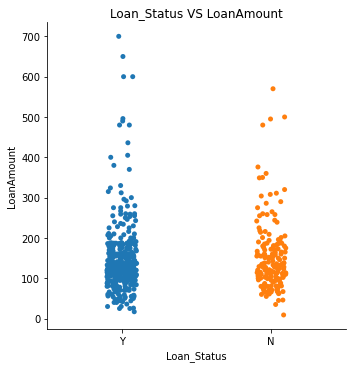

In [2020]:
sns.catplot(data=df,y="LoanAmount",x="Loan_Status")
plt.title("Loan_Status VS LoanAmount")
plt.show()

LoanAmount has a high number of outliers

<function matplotlib.pyplot.show(close=None, block=None)>

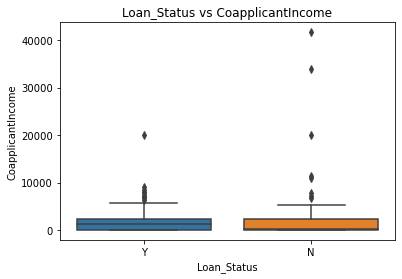

In [2021]:
sns.boxplot(x="Loan_Status", y="CoapplicantIncome", data=df)
plt.title("Loan_Status vs CoapplicantIncome")
plt.show

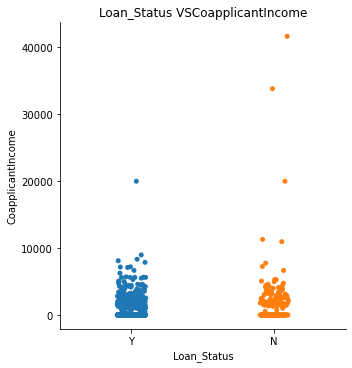

In [2022]:
sns.catplot(data=df,y="CoapplicantIncome",x="Loan_Status")
plt.title("Loan_Status VSCoapplicantIncome")
plt.show()

 CoapplicantIncome has a high number of outliers

### Data Preprocessing

***Checking the missing values***

In [2023]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

***Checking the missing values as a precentage***

In [2024]:
df.isnull().sum()/len(df)*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

***Cheaking Duplicates***

In [2025]:
df.duplicated().sum()

0

We need to drop ID column for the data modeling.

In [2026]:
df = df.drop(['Loan_ID'], axis = 1)

In [2027]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


 ***Data Imputation***

Need to remove null values

Backward filling (Filling with previous values)

In [2028]:
df=df.fillna(method="bfill")
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2029]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

No null values now

Now we need to transform categorical variables into numarical ones.Most of the the categorical variables are dichotomous so we can use labelencoding.

In [2030]:
df[["Gender","Married","Dependents","Education","Self_Employed","Property_Area","Loan_Status"]].value_counts()

Gender  Married  Dependents  Education     Self_Employed  Property_Area  Loan_Status
Male    Yes      0           Graduate      No             Semiurban      Y              37
                                                          Urban          Y              27
                                                          Rural          Y              25
        No       0           Graduate      No             Semiurban      Y              19
        Yes      2           Graduate      No             Semiurban      Y              18
                                                                                        ..
Female  Yes      2           Graduate      No             Urban          N               1
                                                                         Y               1
Male    Yes      0           Not Graduate  Yes            Urban          Y               1
                                                          Semiurban      N               1
     

Creating a label encoder

In [2031]:
le=LabelEncoder()
le

LabelEncoder()

In [2032]:
df[["Gender","Married","Dependents","Education","Self_Employed","Loan_Status"]]=df[["Gender","Married","Dependents","Education","Self_Employed","Loan_Status"]].apply(lambda col : le.fit_transform(col))
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,Urban,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,Rural,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,Rural,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,Urban,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,Urban,1


One hot encoding for needful categorical variables seperately (More than 2 levels)

Creating a one hot encoder

In [2033]:
ohe=OneHotEncoder()
ohe

OneHotEncoder()

In [2034]:
ohot_encoded=ohe.fit_transform(df["Property_Area"].values.reshape(len(df["Property_Area"].values),1)).toarray()
ohot_encoded

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [2035]:
ohot_encoded2=ohot_encoded[:,1:].astype(int) #Dummy trapping and changing type to int
ohot_encoded2

array([[0, 1],
       [0, 0],
       [0, 1],
       ...,
       [0, 1],
       [0, 1],
       [1, 0]])

Creating a dataframe with encoded data

In [2036]:
df_ohot=pd.DataFrame(ohot_encoded2,columns=["Semiurban","Urban",])
df_ohot

,Semiurban,Urban
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
609,0,0
610,0,0
611,0,1
612,0,1


In [2037]:
df=pd.concat([df,df_ohot],axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Semiurban,Urban
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,Urban,1,0,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,1,0,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,1,0,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,Rural,1,0,0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,Rural,1,0,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,Urban,1,0,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,Urban,1,0,1


In [2038]:
df.drop("Property_Area",axis=1,inplace=True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Semiurban,Urban
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,1,0,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,1,0,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,1,0,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,1,0,0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,1,0,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,1,0,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,1,0,1


In [2039]:
col=list(df.columns)
col

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Loan_Status',
 'Semiurban',
 'Urban']

In [2040]:
df_new=df.reindex(columns=col[:10]+col[11:]+["Loan_Status"])
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Semiurban,Urban,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,0,1,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,0,1,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,0,1,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,0,1,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,0,1,1


Remove Outliers & Infinite values 

In [2041]:
col=[df_new.columns]
col

[Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
        'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Semiurban', 'Urban',
        'Loan_Status'],
       dtype='object')]

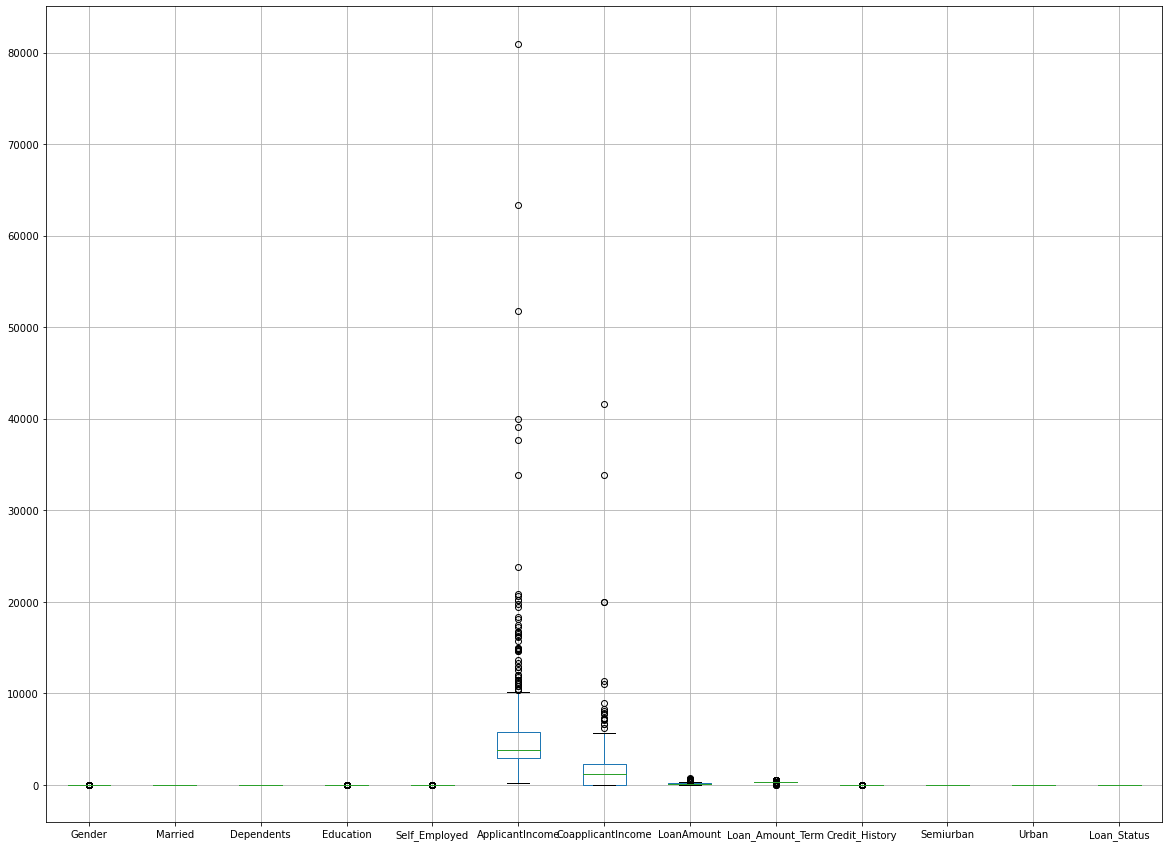

In [2042]:
boxplot=df_new.boxplot(column=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
        'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Semiurban', 'Urban',
        'Loan_Status'],figsize=[20,15])

In [2043]:
Q1 = df_new.quantile(0.25)
Q3 = df_new.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Gender                  0.00
Married                 1.00
Dependents              2.00
Education               0.00
Self_Employed           0.00
ApplicantIncome      2917.50
CoapplicantIncome    2297.25
LoanAmount             66.75
Loan_Amount_Term        0.00
Credit_History          0.00
Semiurban               1.00
Urban                   1.00
Loan_Status             1.00
dtype: float64


In [2044]:
out_rows=(df_new < (Q1 - 1.5 * IQR)) |(df_new > (Q3 + 1.5 * IQR))

In [2045]:
out_rows

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Semiurban,Urban,Loan_Status
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,True,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,True,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


***Removing outliers***

This will return True for all the rows which have at least one outof bound row

In [2046]:
out_rows=((df_new < (Q1 - 1.5 * IQR)) |(df_new > (Q3 + 1.5 * IQR))).any(axis=1) 
out_rows

0      False
1      False
2       True
3       True
4      False
       ...  
609     True
610     True
611    False
612    False
613     True
Length: 614, dtype: bool

In [2047]:
Q1 = df_new.quantile(0.25)
Q3 = df_new.quantile(0.75)
IQR = Q3 - Q1

df_new1 = df_new[~((df_new < (Q1 - 1.5 * IQR)) |(df_new > (Q3 + 1.5 * IQR))).any(axis=1)]

In [2048]:
df_new1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Semiurban,Urban,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,0,1,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,0
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,0,1,1
8,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,0,1,1
10,1,1,2,0,0,3200,700.0,70.0,360.0,1.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,1,0,0,0,0,3676,4301.0,172.0,360.0,1.0,0,0,1
606,1,1,1,0,0,3400,2500.0,173.0,360.0,1.0,1,0,1
608,1,1,0,0,0,3232,1950.0,108.0,360.0,1.0,0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,0,1,1


 ***Class Imbalance***

In [2049]:
x=df_new1.iloc[:,:12]
y=df_new1.iloc[:,12]

In [2050]:
y.value_counts()

1    180
0     34
Name: Loan_Status, dtype: int64

Creating a SMOTE object

In [2051]:
smt=SMOTE()

Performing SMOTE

In [2052]:
x_sm,y_sm=smt.fit_resample(x,y)

In [2053]:
y_sm.value_counts()

1    180
0    180
Name: Loan_Status, dtype: int64

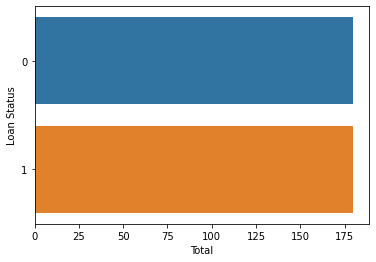

In [2054]:
sns.countplot(y=y_sm, data=df_new1)
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

In [2055]:
x_sm

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Semiurban,Urban
0,1,0,0,0,0,5849,0.000000,128.000000,360.0,1.0,0,1
1,1,1,1,0,0,4583,1508.000000,128.000000,360.0,1.0,0,0
2,1,0,0,0,0,6000,0.000000,141.000000,360.0,1.0,0,1
3,1,1,2,0,0,4006,1526.000000,168.000000,360.0,1.0,0,1
4,1,1,2,0,0,3200,700.000000,70.000000,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
355,1,0,0,0,0,9074,0.000000,240.884116,360.0,1.0,0,0
356,1,0,0,0,0,7071,0.000000,141.296528,360.0,1.0,0,0
357,1,0,0,0,0,3575,0.000000,86.350483,360.0,1.0,0,0
358,1,1,0,0,0,3474,1682.680564,84.774812,360.0,1.0,0,0


Splitting Data Set

In [2056]:
x_train, x_test, y_train, y_test = train_test_split(x_sm,y_sm, test_size = 0.2, random_state = 0)

In [2057]:
x_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Semiurban,Urban
250,1,1,1,0,0,4142,0.000000,79.777088,360.0,1.0,0,1
312,1,1,1,0,0,7664,0.000000,156.526656,360.0,1.0,1,0
341,1,1,1,0,0,2459,1637.325814,150.689389,360.0,1.0,0,0
284,1,0,0,0,0,3594,0.000000,81.357811,360.0,1.0,0,0
21,1,1,2,0,0,2708,1167.000000,97.000000,360.0,1.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
323,1,0,2,0,0,5305,0.000000,95.547145,360.0,1.0,0,1
192,1,0,0,0,0,2526,1783.000000,145.000000,360.0,1.0,0,0
117,1,1,1,0,0,2014,2925.000000,113.000000,360.0,1.0,0,1
47,1,1,0,0,0,5568,2142.000000,175.000000,360.0,1.0,0,0


In [2058]:
y_train

250    0
312    0
341    0
284    0
21     1
      ..
323    0
192    1
117    0
47     0
172    0
Name: Loan_Status, Length: 288, dtype: int32

# logistic regression

Creating the logistic regression model

In [2287]:
model1=LogisticRegression()

Training the model with training data

In [2288]:
model1.fit(x_train,y_train)

LogisticRegression()

Estimated coefficients for parameters and intercept of the model

In [2076]:
model1.coef_

array([[-7.12364351e-06,  7.37340881e-01,  2.07502665e-01,
         0.00000000e+00,  0.00000000e+00,  1.55037185e-04,
         3.32010034e-04, -1.00041910e-02, -2.56451167e-03,
        -7.12364351e-06,  1.92943338e+00,  3.82154925e-01]])

In [2077]:
model1.intercept_

array([-7.54895901e-06])

Predict the class of the unseen data

In [2078]:
y_pred1=model1.predict(x_test)
y_pred1

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1])

Predicted probabilities for each observation

In [2079]:
y_pred_probs=model1.predict_proba(x_test)
y_pred_probs

array([[0.6971011 , 0.3028989 ],
       [0.68358423, 0.31641577],
       [0.20121384, 0.79878616],
       [0.70481991, 0.29518009],
       [0.16946933, 0.83053067],
       [0.26579297, 0.73420703],
       [0.68876168, 0.31123832],
       [0.82650294, 0.17349706],
       [0.70270308, 0.29729692],
       [0.68595377, 0.31404623],
       [0.42605857, 0.57394143],
       [0.87283813, 0.12716187],
       [0.62777219, 0.37222781],
       [0.65195292, 0.34804708],
       [0.42098387, 0.57901613],
       [0.39594297, 0.60405703],
       [0.14304683, 0.85695317],
       [0.1875822 , 0.8124178 ],
       [0.14547377, 0.85452623],
       [0.84272492, 0.15727508],
       [0.30955083, 0.69044917],
       [0.77372749, 0.22627251],
       [0.35237163, 0.64762837],
       [0.41496999, 0.58503001],
       [0.60251156, 0.39748844],
       [0.58540952, 0.41459048],
       [0.30069252, 0.69930748],
       [0.16904769, 0.83095231],
       [0.581636  , 0.418364  ],
       [0.13607051, 0.86392949],
       [0.

Confusion matrix

In [2080]:
confusion_matrix(y_test,y_pred1)

array([[29,  7],
       [ 8, 28]], dtype=int64)

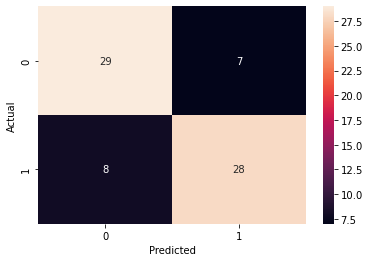

In [2081]:
sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True,fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Accuracy & Misclassification Error

In [2082]:
accuracy=accuracy_score(y_test,y_pred1)
accuracy*100

79.16666666666666

In [2083]:
MCE=1-accuracy
MCE

0.20833333333333337

In [2084]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73        36
           1       0.73      0.75      0.74        36

    accuracy                           0.74        72
   macro avg       0.74      0.74      0.74        72
weighted avg       0.74      0.74      0.74        72



# K-Nearest Neighbour (KNN)

Validation set approach

In [2099]:
xtr,xts,ytr,yts=train_test_split(x_train,y_train,test_size=0.2,random_state=0)

In [2100]:
K=range(1,21)
Errors=[]

for k in K:
    model2=KNeighborsClassifier(n_neighbors=k)
    model2.fit(xtr,ytr)
    ypr=model2.predict(xts)
    Errors.append(1-accuracy_score(yts,ypr))

In [2101]:
Errors

[0.3448275862068966,
 0.43103448275862066,
 0.4482758620689655,
 0.4655172413793104,
 0.43103448275862066,
 0.5,
 0.48275862068965514,
 0.5344827586206897,
 0.5172413793103448,
 0.5517241379310345,
 0.48275862068965514,
 0.5344827586206897,
 0.48275862068965514,
 0.48275862068965514,
 0.4655172413793104,
 0.5,
 0.48275862068965514,
 0.5344827586206897,
 0.5344827586206897,
 0.5344827586206897]

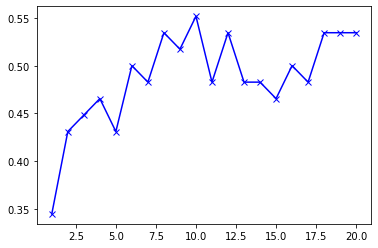

In [2102]:
plt.plot(K,Errors,'bx-')
plt.show()

In [2103]:
knncl = KNeighborsClassifier(n_neighbors=1)
knncl.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [2104]:
y_pred2=knncl.predict(x_test)
y_pred2

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1])

In [2300]:
accuracy_score(y_test,y_pred2)*100

66.66666666666666

In [2106]:
confusion_matrix(y_test,y_pred2)

array([[30,  6],
       [18, 18]], dtype=int64)

In [2107]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.62      0.83      0.71        36
           1       0.75      0.50      0.60        36

    accuracy                           0.67        72
   macro avg       0.69      0.67      0.66        72
weighted avg       0.69      0.67      0.66        72



# Support Vector Machine

In [2108]:
params={"C":[0.1,0.5,1],"kernel":["linear","poly"]}
model3=SVC()
cval=KFold(n_splits=5)

In [2109]:
gsearch = GridSearchCV(model3, params,cv=cval)

In [2110]:
results = gsearch.fit(x_train, y_train)

In [2111]:
results.best_params_

{'C': 1, 'kernel': 'linear'}

In [2112]:
svcl=SVC(kernel="linear",C=1)

In [2113]:
svcl.fit(x_train,y_train)

SVC(C=1, kernel='linear')

In [2301]:
y_pred3=svcl.predict(x_test)
accuracy_score(y_test,y_pred)*100

77.77777777777779

In [2115]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76        36
           1       0.76      0.78      0.77        36

    accuracy                           0.76        72
   macro avg       0.76      0.76      0.76        72
weighted avg       0.76      0.76      0.76        72



# Naive Bayes

In [2116]:
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [2117]:
y_pred4=nb.predict(x_test)
accuracy_score(y_test,y_pred4)

0.7638888888888888

In [2118]:
confusion_matrix(y_test,y_pred4)

array([[31,  5],
       [12, 24]], dtype=int64)

In [2119]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.72      0.86      0.78        36
           1       0.83      0.67      0.74        36

    accuracy                           0.76        72
   macro avg       0.77      0.76      0.76        72
weighted avg       0.77      0.76      0.76        72



# Decision Tree

In [2120]:
clt = DecisionTreeClassifier()
clt.fit(x_train, y_train)

DecisionTreeClassifier()

In [2124]:
text_representation = export_text(clt)
print(text_representation)

|--- feature_10 <= 0.50
|   |--- feature_11 <= 0.50
|   |   |--- feature_2 <= 1.50
|   |   |   |--- feature_5 <= 3635.00
|   |   |   |   |--- feature_6 <= 1945.14
|   |   |   |   |   |--- feature_5 <= 2934.50
|   |   |   |   |   |   |--- feature_7 <= 90.37
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_7 >  90.37
|   |   |   |   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_5 <= 2632.50
|   |   |   |   |   |   |   |   |   |--- feature_7 <= 138.58
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_7 >  138.58
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_5 >  2632.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_1 >  0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_5 >  2934.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feat

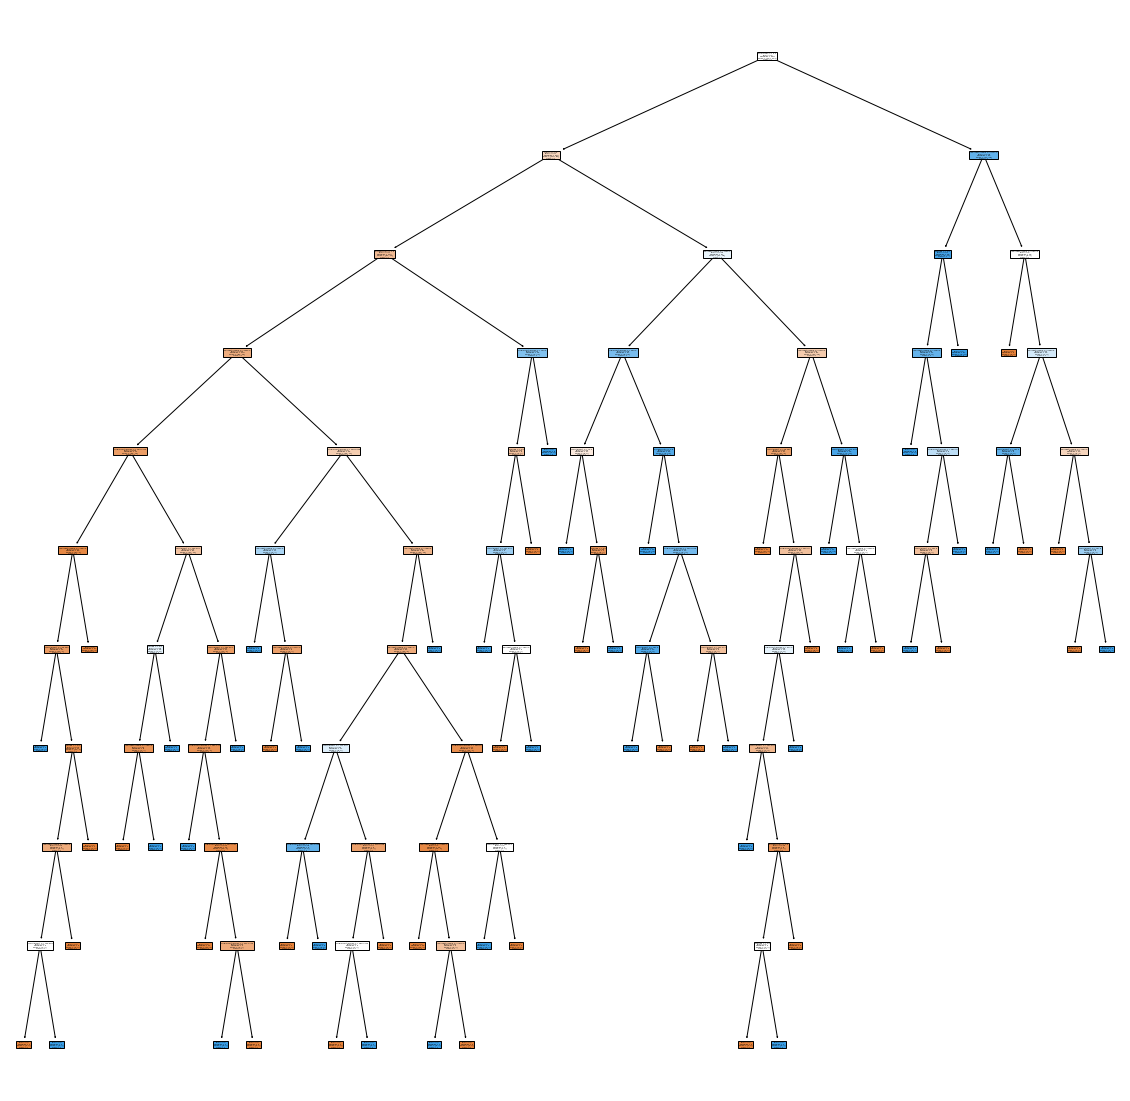

In [2126]:
plt.figure(figsize=(20,20))
plot_tree(clt,feature_names=df_new1.columns,class_names=["0","1"],filled=True)
plt.show()

Pruining tree

In [2217]:
params={"max_leaf_nodes":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],"max_features":[1,2,3,4,5,6,7,8,9]} #hyperparamaeter optimization
model5=DecisionTreeClassifier()
cv=KFold(n_splits=10,shuffle=True)

In [2218]:
?DecisionTreeClassifier

In [2219]:
gsearch = GridSearchCV(model5, params,cv=cv)

In [2239]:
results = gsearch.fit(x_train, y_train)

In [2240]:
results.best_params_

{'max_features': 7, 'max_leaf_nodes': 15}

In [2241]:
cltp = DecisionTreeClassifier(max_depth=7,max_leaf_nodes=15)
cltp.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=15)

In [2247]:
y_pred5=cltp.predict(x_test)
y_pred5

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1])

In [2248]:
accuracy_score(y_test,y_pred5)

0.8055555555555556

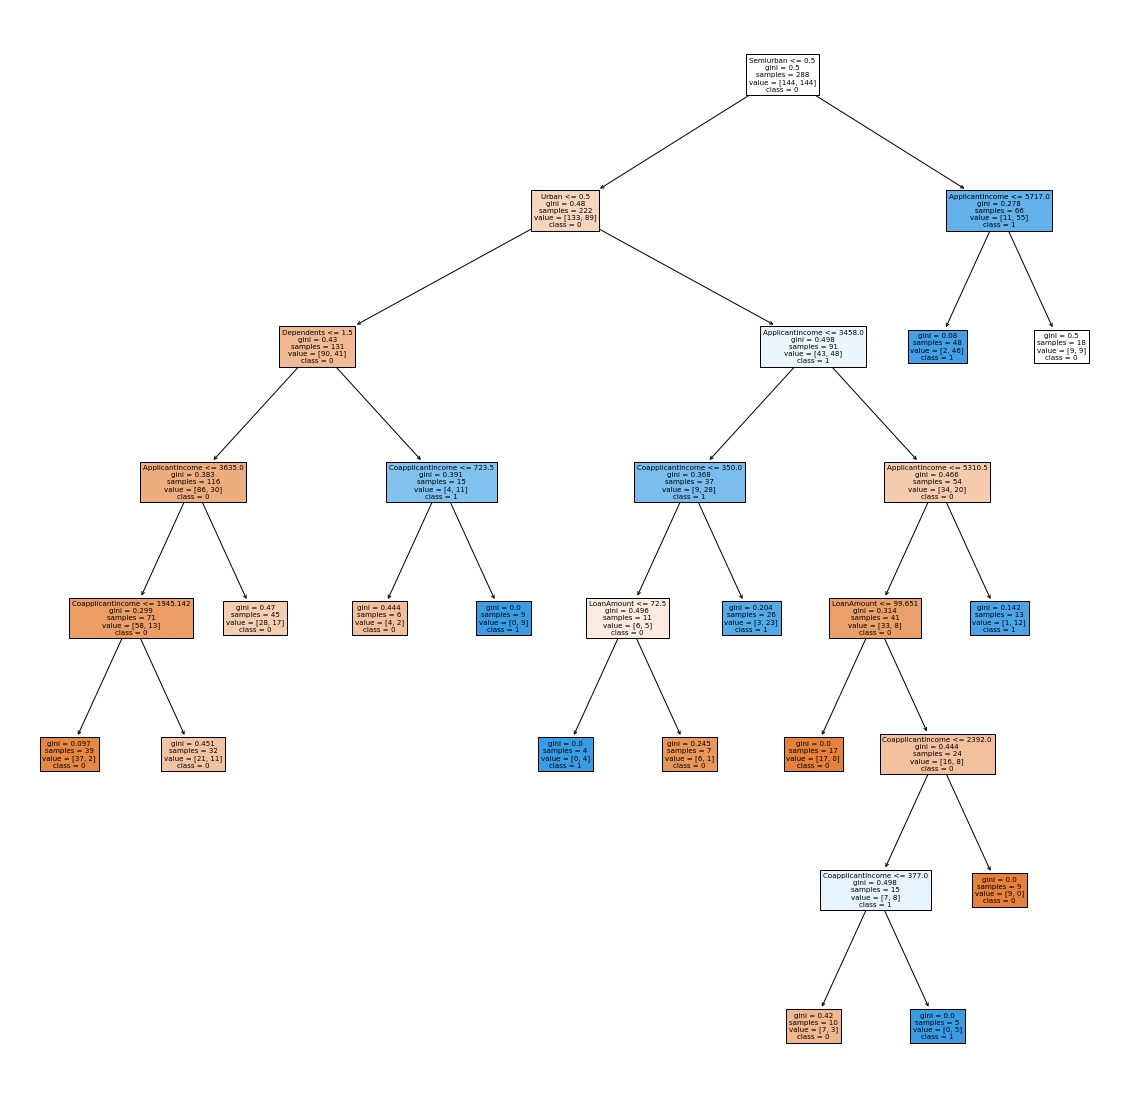

In [2242]:
plt.figure(figsize=(20,20))
plot_tree(cltp,feature_names=df_new1.columns,class_names=["0","1"],filled=True)
plt.show()

# Random Forest

In [2271]:
rfcl = RandomForestClassifier()
rfcl.fit(x_train, y_train)

RandomForestClassifier()

In [2253]:
?RandomForestClassifier

In [2272]:
y_pred6=rfcl.predict(x_test)

In [2289]:
accuracy_score(y_test,y_pred6)*100

86.11111111111111

# Gradient Boosting

In [2304]:
params={'n_estimators':[100,200,300,400,500],
      'max_depth':[1,2,3,4,5],
      'subsample':[0.5,1],
      'max_leaf_nodes':[2,5,10,20,30,40,50]}
model7=GradientBoostingClassifier()
cval=KFold(n_splits=5)

In [2284]:
gsearch = GridSearchCV(model7, params,cv=cval)

In [2285]:
results = gsearch.fit(x_train, y_train)

In [2305]:
results.best_params_

{'max_depth': 5, 'max_leaf_nodes': 40, 'n_estimators': 500, 'subsample': 0.5}

In [2306]:
gradcl=GradientBoostingClassifier(max_depth= 5, max_leaf_nodes=40, n_estimators= 500, subsample= 0.5)
gradcl.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=5, max_leaf_nodes=40, n_estimators=500,
                           subsample=0.5)

In [2307]:
y_pred7=gradcl.predict(x_test)

In [2308]:
accuracy_score(y_test,y_pred7)*100

80.55555555555556

# Model Comparison

In [2309]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 
                                  'SVM', 'Categorical NB', 
                                  'Gaussian NB', 'Decision Tree', 
                                  'Random Forest', 'Gradient Boost'], 
                        'Accuracy': [79.16666666666666,66.66666666666666, 77.77777777777779, 
                                     76.38888888888888, 76.38888888888888, 80.55555555555556, 
                                     86.11111111111111, 80.55555555555556]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
6,Random Forest,86.111111
5,Decision Tree,80.555556
7,Gradient Boost,80.555556
0,Logistic Regression,79.166667
2,SVM,77.777778
3,Categorical NB,76.388889
4,Gaussian NB,76.388889
1,K Neighbors,66.666667


The highest accuracy is 86.111111 by Random Forest Model .

The lowest accuracy is 66.666667 by K Neighbors Model.

***References***

https://www.kaggle.com/kamalkhumar/loan-status-prediction

S. Menard. Logistic regression: From introductory to advanced concepts and applications. Sage Publica- tions, 2009.

V. Vapnik. The nature of statistical learning theory. Springer Science & Business Media, 2013.
